In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import matplotlib.patches as patches

In [2]:
p = 19747823.9 #population

i = 0.03*p  #infected
s = p-i #susceptible
r = 0.1 #recovered/removed
e=0.2*p #exposed
d= 0    #dead

alpha = 1.3  #transmission parameter
beta = 0.2 #recovery parameter
gamma = 0.03 #mortality parameter

#Defence Strategy Parameters
m = 0.3 #masking
sd = 0.2 #social distancing
ct = 5 #contact tracing

#Attacking Strategy Parameters
ri = 1.2 #reduced incubation
e = 1.35 #evolution of the disease
rz = 1.5 #creating red zones

#Cost Function Parameters for Defender
CMM = 2
CM = 1
CSSD = 5
CSD = 4
CCT = 25

#Cost Function Parameters for Attacker
CRI = 3.5
CE = 4.8
CRZ = 6.7

initialTime = 0
deltaTime = 0.03 #dividing time into small parts
maxTime = 500 #maximum time over which the model is observed
maxTimeInitial = maxTime

In [3]:
#alpha is the transmission rate
#beta is the recovery rate
#gamma is the mortality rate

def susceptible(S, I, alpha):    
    return -1*((alpha*S*I)/p)

def exposed(S, I, E, alpha, beta): 
    return ((alpha*S*I)/p)-beta*E

def infected(I, S, alpha, beta, gamma):
    return (((alpha*S)/p)-beta)*I - gamma*I

def recovered(I, beta):
    return beta*I

def dead(I, gamma):
    return gamma*I

def infect_after_strategy(I, S, strategy_factor, alpha, beta, gamma): 
    return strategy_factor*((((alpha*S)/p)-beta)*I - gamma*I)

def masking_cost(S, I):
    return CMM*I + CM*S
                          
def socialdistancing_cost(S, I):
    return CSSD*I + CSD*S
                          
def contacttracing_cost(I):
    return CCT*I
    
def reducedincubation_cost(S, R):
    return (S + R)*CRI
                          
def evolution_cost(S, R):
    return (S + R)*CE
                          
def redzones_cost(S, R):
    return (S + R)*CRZ
                          
                          

In [4]:
def Cost_generation(transRate, recovRate, maxT): # defining a data generating function for generating variable s, e, i, r, d values
    global alpha, beta, gamma, strategy_factor, maxTimeInitial #defining the variables for generating data
    
    # initializing the variables
    
    alpha = transRate
    beta = recovRate
    
    maxTimeInitial = maxT

    sInitial = s
    iInitial = i
    rInitial = r
    mInitial = m
    sdInitial = sd
    ctInitial = ct
    riInitial = ri
    eInitial = e
    redInitial = rz
    
    
    time = np.arange(maxTimeInitial+1) 
    mVals = np.zeros(maxTimeInitial+1) 
    sdVals = np.zeros(maxTimeInitial+1) 
    ctVals = np.zeros(maxTimeInitial+1) 
    riVals = np.zeros(maxTimeInitial+1) 
    eVals = np.zeros(maxTimeInitial+1) 
    redVals = np.zeros(maxTimeInitial+1)

    for t in range(initialTime, maxTimeInitial+1): #generating new values with change of time t
        mVals[t] = mInitial
        sdVals[t] = sdInitial
        ctVals[t] = ctInitial
        riVals[t] = riInitial
        eVals[t] = eInitial
        redVals[t] = redInitial
        
        newDeltas = (masking_cost(sInitial, iInitial), socialdistancing_cost(iInitial, sInitial), 
                     contacttracing_cost(iInitial), reducedincubation_cost(sInitial, rInitial),
                     evolution_cost(sInitial, rInitial), redzones_cost(sInitial, rInitial))
        
        mInitial += newDeltas[0]*deltaTime 
        sdInitial += newDeltas[1]*deltaTime 
        ctInitial += newDeltas[2]*deltaTime 
        riInitial += newDeltas[3]*deltaTime 
        eInitial += newDeltas[4]*deltaTime
        redInitial += newDeltas[5]*deltaTime
      
        if mInitial < 0 or sdInitial < 0 or ctInitial < 0 or riInitial <0 or eInitial < 0 or redInitial <0 :
            break 
            
    return (time, mVals, sdVals, ctVals, riVals, eVals, redVals)


In [5]:
t, c_m, c_sd, c_ct, c_ri, c_e, c_red = Cost_generation(alpha, beta, maxTimeInitial)

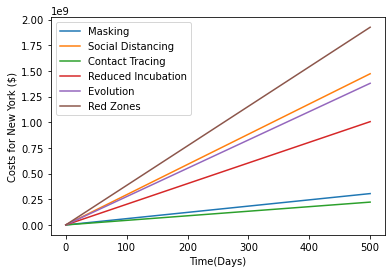

In [6]:
plt.figure()
plt.plot(t, c_m, label='Masking')
plt.plot(t, c_sd, label='Social Distancing')
plt.plot(t, c_ct, label='Contact Tracing')
plt.plot(t, c_ri, label='Reduced Incubation')
plt.plot(t, c_e, label='Evolution')
plt.plot(t, c_red, label='Red Zones')
plt.xlabel('Time(Days)')
plt.ylabel('Costs for New York ($)')
plt.legend()
plt.savefig("cost_func.pdf", bbox_inches = 'tight')